In [1]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 76.1 MB 45 kB/s 
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 37 kB/s 
     |████████████████████████████████| 198 kB 51.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=74ffc3e7c02d6f5074e00e5a26ab1c574ade9e6d05a2beeae0ebfb7c1cc7b3e2
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [3]:
# Spark SQL
!pip install pyspark[sql]

In [4]:
# pandas API on Spark
!pip install pyspark[pandas_on_spark] plotly  # to plot your data, you can install plotly together.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from scipy.stats import loguniform
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from catboost import CatBoostClassifier

In [6]:
heart_df = pd.read_csv("https://data-bootcamp-01.s3.us-west-1.amazonaws.com/heart_statlog_cleveland_hungary_final.csv", sep=",")
heart_df.describe()

,age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
heart_df.head(10)

,age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from scipy.stats import loguniform
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from catboost import CatBoostClassifier

In [9]:
heart_df.sex.value_counts().to_frame()

# majority of patients are males (2x)

,sex
1,909
0,281


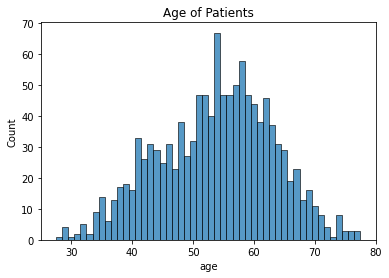

In [10]:
sns.histplot(heart_df.age, discrete=True)
plt.title("Age of Patients")
plt.show()

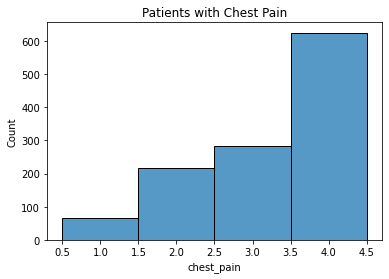

In [12]:
#patients with chest pain (cp)

sns.histplot(heart_df.chest_pain, discrete=True)
plt.title("Patients with Chest Pain")
plt.show()

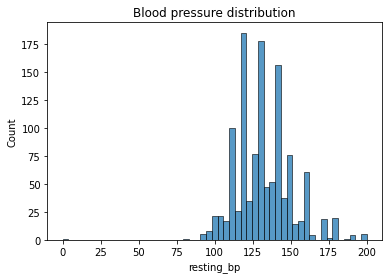

In [14]:
sns.histplot(heart_df.resting_bp)
plt.title('Blood pressure distribution')
plt.show()

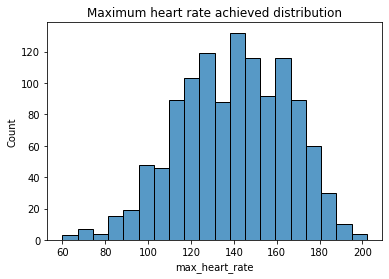

In [15]:
sns.histplot(heart_df.max_heart_rate)
plt.title('Maximum heart rate achieved distribution')
plt.show()

In [16]:
heart_df.columns

Index(['age', 'sex', 'chest_pain', 'resting_bp', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope', 'target'],
      dtype='object')

In [17]:

# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = heart_df.drop(columns=['target'])

# Prepare targets / labels
Y = heart_df['target']
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

print("Training features")
print(X_train)
print("Training labels")
print(y_train)
print("Test features")
print(X_test)
print("Test labels")
print(y_test)



Training features
     age  sex  chest_pain  resting_bp  cholesterol  fasting_blood_sugar  \
67    32    1           2         110          225                    0   
962   65    0           3         160          360                    0   
426   60    1           2         160          267                    1   
257   55    0           2         130          394                    0   
530   72    1           4         143          211                    0   
..   ...  ...         ...         ...          ...                  ...   
731   42    1           2         120          295                    0   
723   51    1           3         100          222                    0   
489   65    1           1         140          252                    0   
862   60    1           4         130          253                    0   
807   54    1           4         140          239                    0   

     resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  
67        

In [19]:
rf_classifier = RandomForestClassifier(max_depth=8,
                                       n_estimators=100,
                                       random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [20]:
y_predict = rf_classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)


0.8949579831932774

In [21]:
import pickle
import os
print ('the save model is located in',os.getcwd())
with open('saved-model.txt', 'wb') as f:
    pickle.dump(rf_classifier, f)

the save model is located in /content
